# <mark>Attention!</mark>

This project was originally made in the Russian language. It takes quite a lot of effort to manually translate everything into English. So in order to understand what is going on here, **please download the .ipynb and use an automatic Google page translator in your Jupyter Notebook**. It does a pretty decent job!

P.S. Most of the projects starting from `Module 2` are made in English.

# Описание проекта
Вы работаете в интернет-магазине **«Стримчик»**, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура `ESRB` (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


# Импортируем библиотеки и открываем датасеты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import plotly.express as px
import warnings
import plotly.io as pio


#pyo.init_notebook_mode()
pio.renderers.default = "svg"
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# file loading for Windows
try: 
    games_df = pd.read_csv('datasets/games.csv')
    
# file loading for Linux(?)    
except:
    games_df = pd.read_csv('/datasets/games.csv')

In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


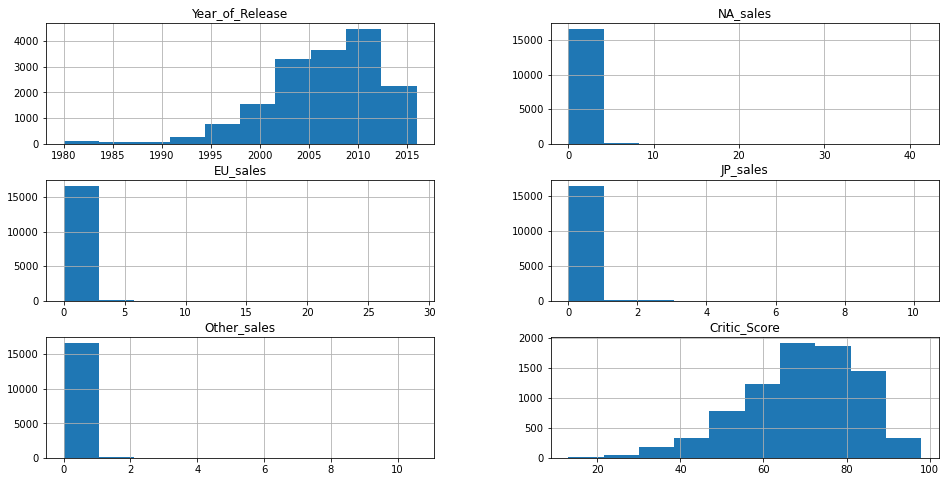

In [5]:
games_df.hist(figsize=(16, 8))
plt.show()

In [6]:
games_df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
games_df.describe(include=['object', 'bool'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


**Промежуточный вывод:**

- имена всех колонок должны быть приведены к нижнему регистру
- есть пропущенные значения в колонках `Year_of_Release`, `Critic_Score`, `User_Score`, `Rating`
- `User_Score` нужно привести к типу `float`

# Подготовка данных
## Заменим названия столбцов (приведём к нижнему регистру);

In [8]:
games_df.columns = [x.lower() for x in games_df.columns]

## Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

Тип данных в колонках `year_of_release` и `critic_scores` заменим на тип данных `nullable int type` для красоты и сокращения используемой памяти.

In [9]:
games_df.year_of_release = games_df.year_of_release.astype('Int16')
games_df.critic_score = games_df.critic_score.astype('Int8')

In [10]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int8   
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int16(1), Int8(1), float64(4), object(5)
memory usage: 1.2+ MB


**Промежуточный вывод:** замена типов данных позволила немного сократить объём занимаемой памяти. Переводить типы данных в колонках platform, genre, и rating в категории не стоит - потом будут проблемы с графиками.

## Обработаем пропуски

### Колонки `name` и `genre`
Как видим, пропусков всего 2, они пересекаются и большинство данных в них отсутствует. Удалим эти пропуски.

In [11]:
games_df[(games_df.name.isna()) & ((games_df.genre.isna()))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [12]:
games_df.dropna(subset=['name', 'genre'], inplace=True)

### Колонка `year_of_release`

Видим, что в данной колонке у нас 269 пропусков. 17 игр имеют в конце своего имени год выпуска. Можем его достать с помощью регулярных выражений. Однако, некоторые игры выпускаются, скажем, в декабре 2007-го (например), а в названии может стоять уже 2008-ой. Или какой-то условный "Bladerunner 2049" с пропуском года выпуска сделает нашему датасету больно. Так что лучше не трогать это дело.

In [13]:
games_df.year_of_release.isna().sum()

269

In [14]:
games_df[games_df.year_of_release.isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN


**Обработка аббревиатуры `tbd`**

Сама аббревиатура означает `to be discussed` , т.е. оценка ещё находится на обсуждении. По факту это тот же пропуск значения, т.е. NaN

In [15]:
games_df[games_df.user_score=='tbd'].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14216,Zoo Vet: Endangered Animals,DS,2008,Simulation,0.03,0.00,0.0,0.00,<NA>,tbd,E10+
14048,Fading Shadows,PSP,2008,Puzzle,0.03,0.00,0.0,0.00,62,tbd,E
2971,World of Zoo,DS,2009,Simulation,0.42,0.20,0.0,0.06,<NA>,tbd,E
14078,Real Soccer 2008,DS,2007,Sports,0.03,0.00,0.0,0.00,<NA>,tbd,E
2914,FIFA Soccer 11,DS,2010,Sports,0.13,0.49,0.0,0.08,63,tbd,E


In [16]:
games_df.user_score = games_df.user_score.replace(('tbd', np.nan))

`User_Score` приведём к типу `float`

In [17]:
games_df.user_score = games_df.user_score.astype('float')

**Вывод по остальным пропускам:** у нас так же много пропусков в колонках `user_score`, `critic_score` и `rating` но в них нет никакой системы и заполнить их не представляется возможным. Посему, оставим всё как есть. Значения `tbd` заполнили NaN'ами.

## Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [18]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,8.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,8.0,NaN,31.38


# Проведем исследовательский анализ данных
## Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

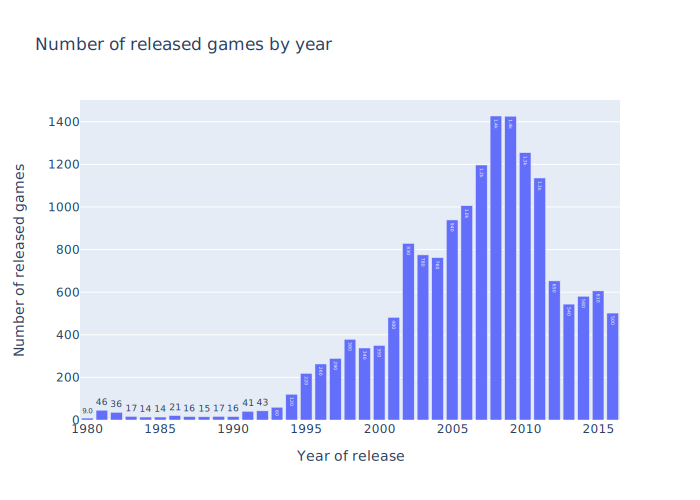

In [19]:
fig = px.bar(games_df.groupby('year_of_release')[['name']].count().reset_index(), 
             x='year_of_release', y='name', labels={'name':'Number of released games', 'year_of_release': 'Year of release'},
             text_auto='.2s', title='Number of released games by year')
fig.show()

**Промежуточный вывод:** ежегодное кол-во выпущенных игр начинает резко расти начиная с 1994-го года, а после 2010-го заметно резкое падение.

## Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


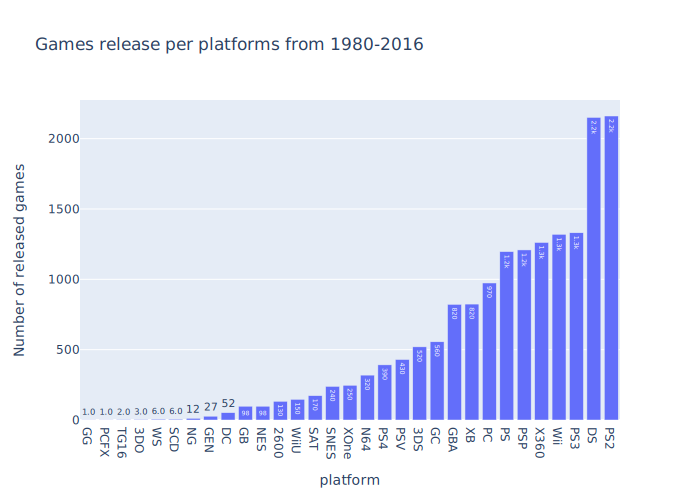

In [20]:
fig = px.bar(games_df.groupby('platform')[['name']].count().sort_values('name', ascending=True).reset_index(),
             x='platform', y='name', title='Games release per platforms from 1980-2016',
             labels={'name':'Number of released games'}, text_auto='0.2s')
fig.show()

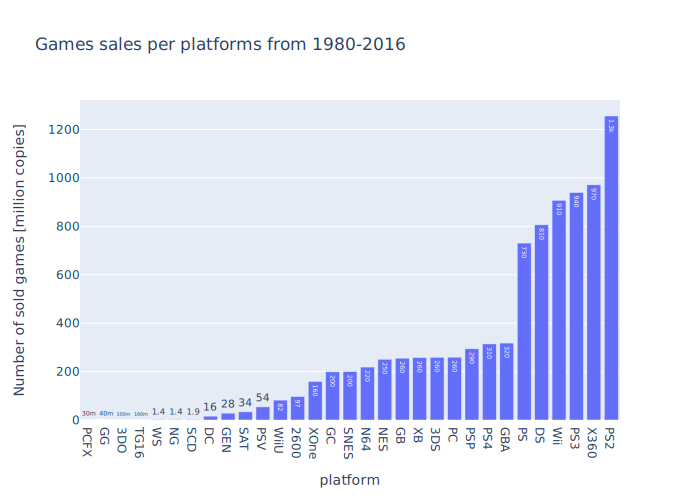

In [21]:
fig = px.bar(games_df.groupby('platform')[['total_sales']].sum().sort_values('total_sales', ascending=True).reset_index(),
             x='platform', y='total_sales', title='Games sales per platforms from 1980-2016',
             labels={'total_sales':'Number of sold games [million copies]'}, text_auto='0.2s')
fig.show()

In [22]:
# получаем имена топ-10 платформ по выпущенным играм
grouped = games_df.groupby('platform')[['total_sales']].sum().sort_values('total_sales', ascending=False).head(6)
grouped

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


In [23]:
# создаём сортированный датафрейм только с топовыми платформами
top_platforms = games_df[games_df.platform.isin(grouped.index)]
top_platforms.platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS'], dtype=object)

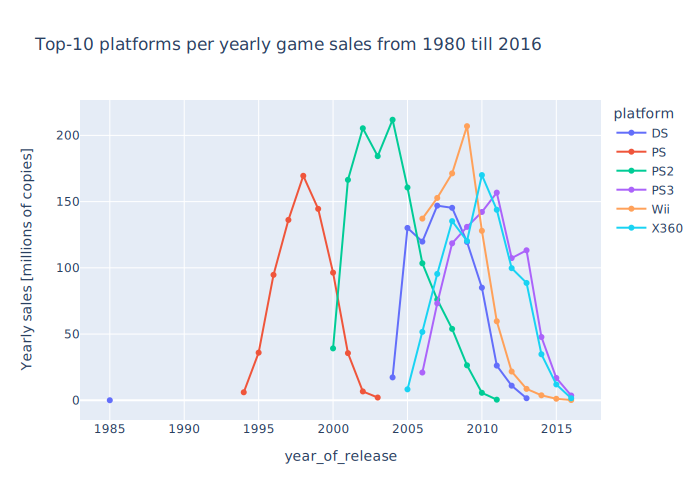

In [24]:
# создаём сводную таблицу с платформами и выпуском их игра по годам
pivot_top_platforms = pd.pivot_table(top_platforms, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

fig = px.line(pivot_top_platforms, x=pivot_top_platforms.index, y=pivot_top_platforms.columns, 
              title='Top-10 platforms per yearly game sales from 1980 till 2016',
              labels={'x':'Year', 'value': 'Yearly sales [millions of copies]'}, markers=True)
fig.show()

**Медианная продолжительность "жизни" платформ, т.е. сколько лет к ним выпускаются игры.**

In [25]:
pivot_all_platforms = pd.pivot_table(games_df, index='year_of_release', columns='platform', values='name', aggfunc='count')

In [26]:
# Медианная продолжительность "жизни" ВСЕХ платформ
pivot_all_platforms.count().median()

7.0

In [27]:
# Медианная продолжительность "жизни" ТОП-10 платформ
pivot_top_platforms.count().median()

11.0

**Промежуточный вывод:** из представленных данных видно, что 6 платформ являются лидерами по проданным копиям (PS2, Xbox360, PS3, Nintendo Wii, Nintendo DS, PS1) с большим отрывом от остальных платформ. В то же время, лидерами по кол-ву выпущенных игр являются PS2 и Nintendo DS с большим отрывом от остальных.

## Возьмем данные за соответствующий актуальный период.

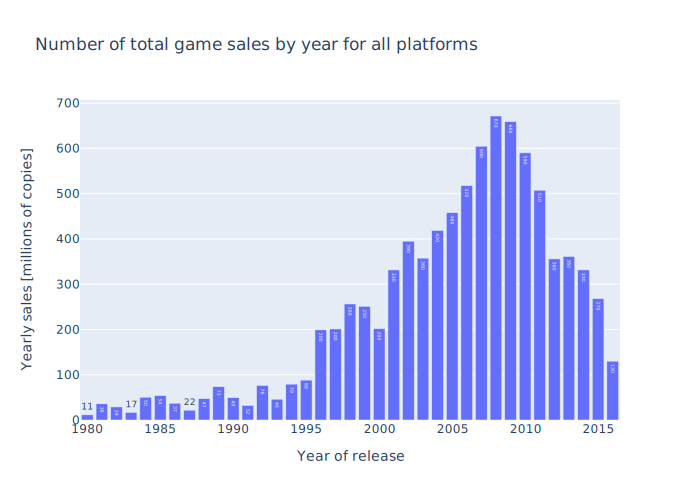

In [28]:
fig = px.bar(games_df.groupby('year_of_release')[['total_sales']].sum().reset_index(), 
             x='year_of_release', y='total_sales', labels={'total_sales':'Yearly sales [millions of copies]', 'year_of_release': 'Year of release'},
             text_auto='.2s', title='Number of total game sales by year for all platforms')
fig.show()

Как видим, продажи сильно упали начиная с 2011-го. В то же время, с 2012-го по 2016 больших скачков не происходило (нужно помнить, что данные за 2017 не полные). Возьмём это время за актуальный период, который поможет нам построить прогноз на 2017-й год.

In [29]:
actual_df = games_df[games_df.year_of_release >= 2012]

## Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

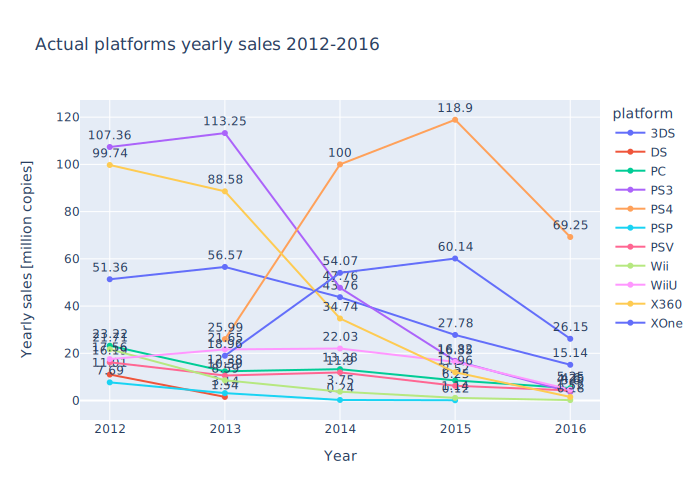

In [30]:
# создаём сводную таблицу с продажами по годам и платформам
actual_platform_sales_pivot = pd.pivot_table(actual_df, index='year_of_release',
                              columns='platform', values='total_sales', aggfunc='sum')
# округляем в ней значения до двух знаком после запятой
actual_platform_sales_pivot = np.round(actual_platform_sales_pivot, 2)

# рисуем график
fig = px.line(actual_platform_sales_pivot, x=actual_platform_sales_pivot.index, y=actual_platform_sales_pivot.columns,
             title='Actual platforms yearly sales 2012-2016',
              labels={'year_of_release':'Year', 'value': 'Yearly sales [million copies]'}, markers=True, text="value")
fig.update_layout(xaxis = dict(dtick = 1))
fig.update_traces(textposition="top center")
fig.show()

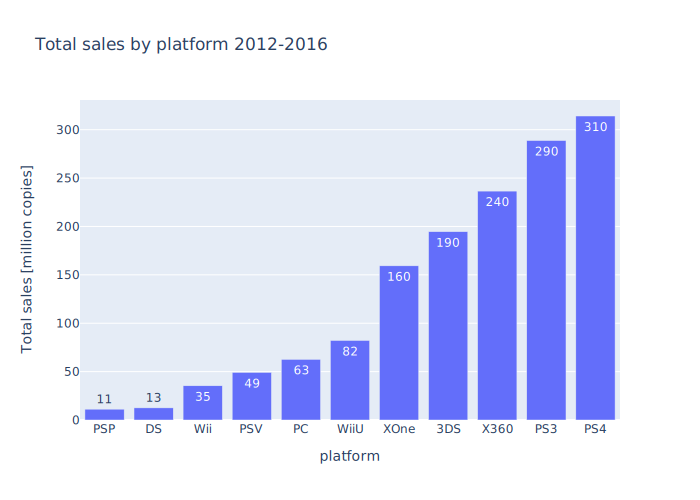

In [31]:
# группируем платформы по общему доходу
actual_platform_sales = actual_df.groupby('platform')[['total_sales']].agg('sum').sort_values('total_sales', ascending=True)

fig = px.bar(actual_platform_sales,
             x=actual_platform_sales.index, y='total_sales',
             title='Total sales by platform 2012-2016',
             labels={'x':'Platform', 'total_sales': 'Total sales [million copies]'},
             text_auto='0.2s')
fig.show()

**Промежуточный вывод:** как видим, продажи по годам по всем платформам падают. Из ещё актуальных платформ, из которых можно хоть что-то выжать у нас остались:
- PS4
- Xbox One
- Nintendo 3DS

## Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

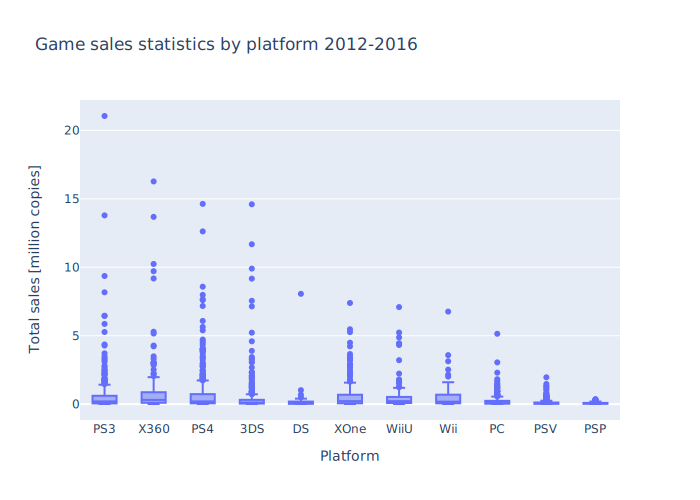

In [32]:
fig = px.box(actual_df, x='platform', y='total_sales', title='Game sales statistics by platform 2012-2016',
             labels={'platform':'Platform', 'total_sales': 'Total sales [million copies]'})
fig.show()

In [33]:
# считаем медиану медиан по продажам
actual_df.groupby('platform')[['total_sales']].median().median()

total_sales    0.18
dtype: float64

**Промежуточный вывод:** мы видим, что медиана продаж у всех платформ находится в пределах 180 тыс. проданных копий c выбросами по отдельным очень успешным тайтлам.

## Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [34]:
# выбираем PS3 как самую актуальную из платформ в имеющемся датасете
ps3_actual_df = actual_df[actual_df.platform == 'PS3']

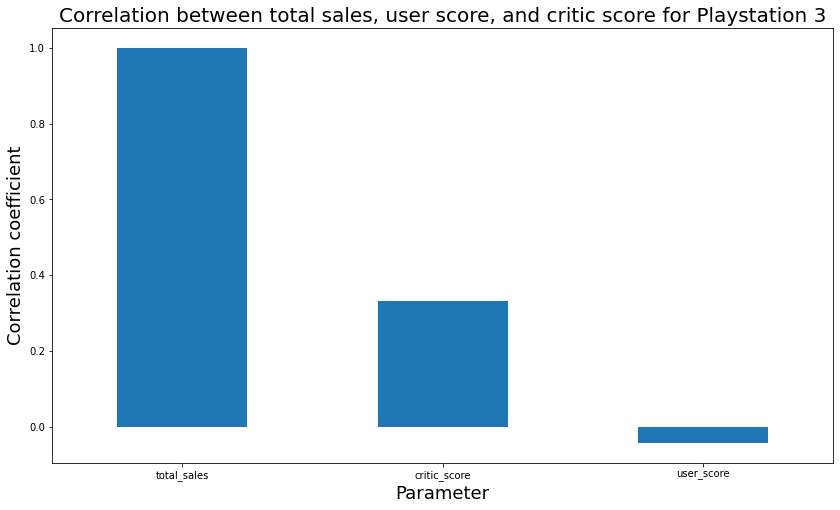

In [35]:
ps3_actual_df[['total_sales', 'user_score', 'critic_score']].corr()['total_sales'].sort_values(ascending=False).plot(kind='bar', figsize=(14,8), rot=0)
plt.title('Correlation between total sales, user score, and critic score for Playstation 3', fontsize=20)
plt.ylabel('Correlation coefficient', fontsize=18)
plt.xlabel('Parameter', fontsize=18)
plt.show()

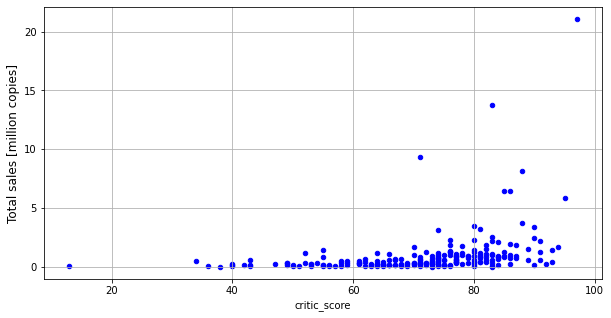

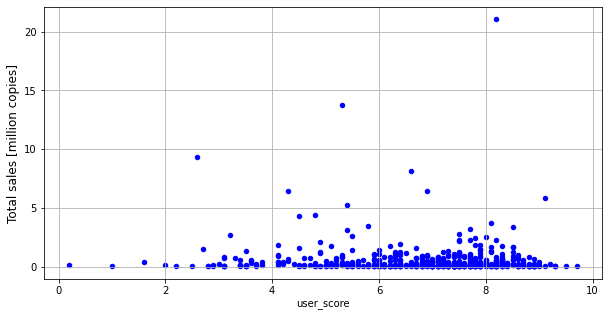

In [36]:
column_names = ['critic_score', 'user_score']

for column in column_names:
    ps3_actual_df.plot(x = column, y = 'total_sales', kind='scatter', grid=True, color='blue', figsize=(10, 5))
    plt.ylabel('Total sales [million copies]', fontsize=12)

**Промежуточный вывод:** по графику корреляции параметров мы видим, что продажи игр для Playstation 3 положительно коррелируют с оценками критиков, и отрицательно коррелируют с оценками игроков. По диаграммам рассеяния заметно, что продажи игр начинают расти, если оценки критиков больше 70-ти баллов. В то же время, многим играм с высокими продажами пользователи поставили оценки от 4 до 7. Т.е. некоторые игры игры, высоко оценённые критиками и, соответственно, вышедшими на хорошие показатели продаж, не понравились многим пользователям. В то же время заметен рост продаж игр при оценках пользователей около 8-ми баллов.

## Соотнесём выводы с продажами игр на других платформах.

In [37]:
# выбираем все платформы кроме PS3
other_platforms_actual_df = actual_df[actual_df.platform != 'PS3']

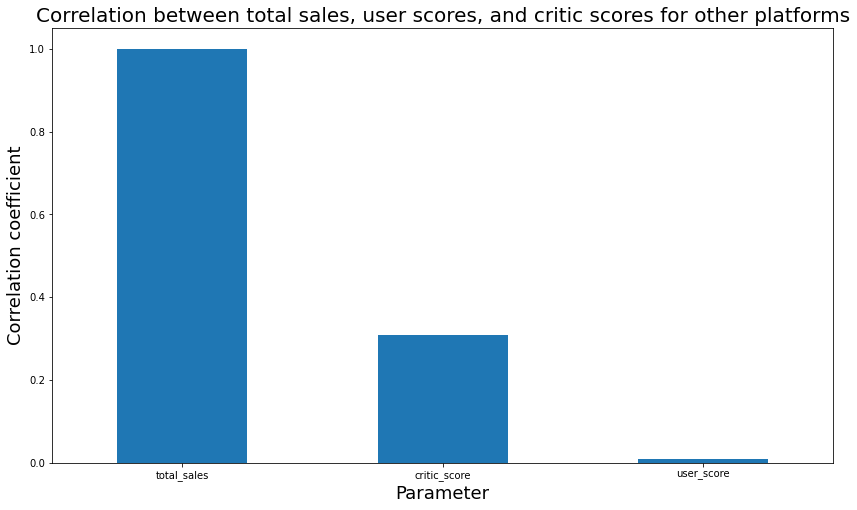

In [38]:
other_platforms_actual_df[['total_sales', 'user_score', 'critic_score']].corr()['total_sales'].sort_values(ascending=False).plot(kind='bar', figsize=(14,8), rot=0)
plt.title('Correlation between total sales, user scores, and critic scores for other platforms', fontsize=20)
plt.ylabel('Correlation coefficient', fontsize=18)
plt.xlabel('Parameter', fontsize=18)
plt.show()

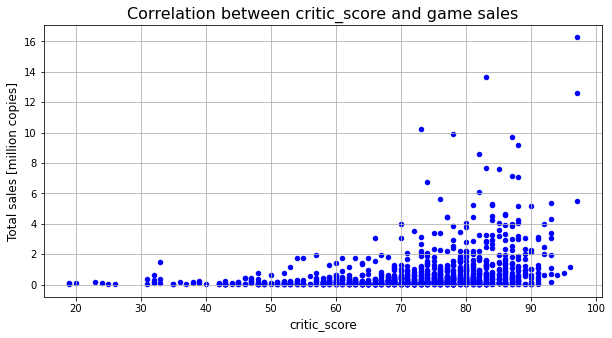

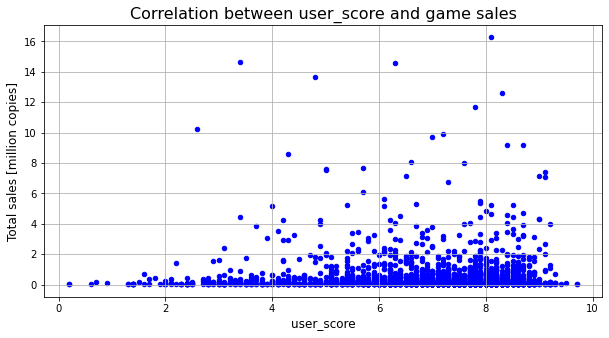

In [39]:
column_names = ['critic_score', 'user_score']

for column in column_names:
    other_platforms_actual_df.plot(x = column, y = 'total_sales', kind='scatter', grid=True, color='blue', figsize=(10, 5))
    plt.ylabel('Total sales [million copies]', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.title(f'Correlation between {column} and game sales', fontsize=16)

**Промежуточный вывод:** по графику корреляции параметров мы видим, что продажи игр для остальных платформ положительно коррелируют с оценками критиков, и не имеют корреляции с оценками игроков. По диаграммам рассеяния заметно, что продажи игр начинают расти, если оценки критиков больше 50-ти баллов (против 70-ти у PS3). В то же время, многим играм с высокими продажами пользователи поставили оценки от 3-ех баллов.

## Посмотрим на общее распределение игр по жанрам.

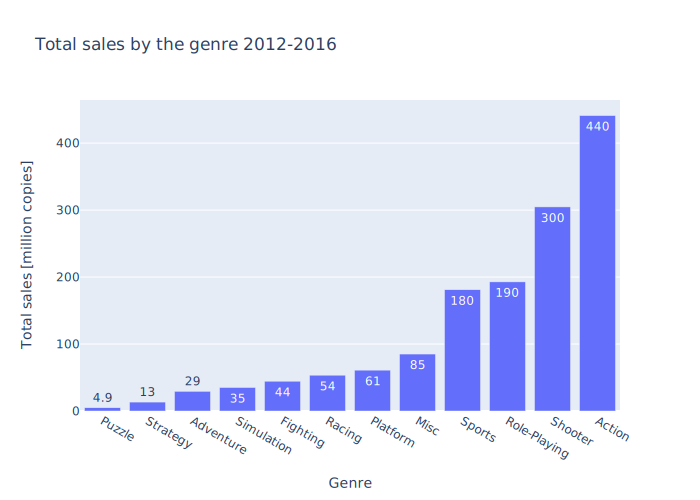

In [40]:
genre_sales = actual_df.groupby('genre')[['total_sales']].sum().sort_values('total_sales',ascending=True)
fig = px.bar(genre_sales, title='Total sales by the genre 2012-2016',
             labels={'value':'Total sales [million copies]', 'genre': 'Genre'}, text_auto='0.2s')
fig.update_layout(showlegend=False) 
fig.show()

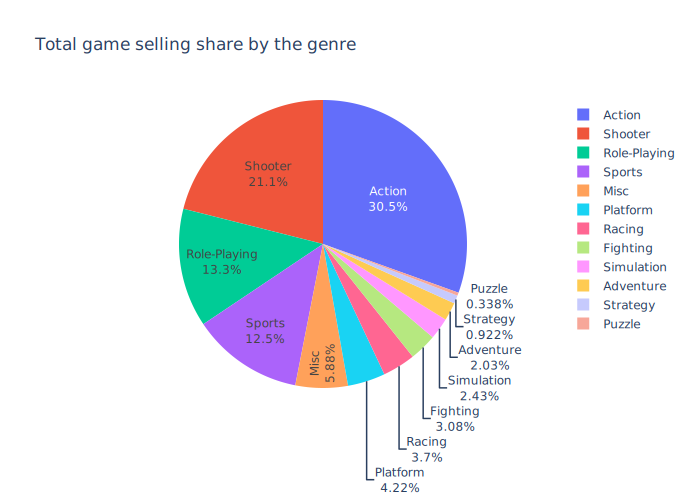

In [41]:
fig = px.pie(genre_sales, values='total_sales', names=genre_sales.index,
             title='Total game selling share by the genre', hover_name=genre_sales.index)
fig.update_traces(text = genre_sales.index)
fig.show()

**Промежуточный вывод:** видно, что первым про продажам следует жанр `Action`, за ним `Shooter`, и третье место делят `Sports` и `Role-Playing`. Интересно, что одними из самых низких по продажам являются стратегии.

# Составим портрет пользователя каждого региона
## Определим для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы по регионам

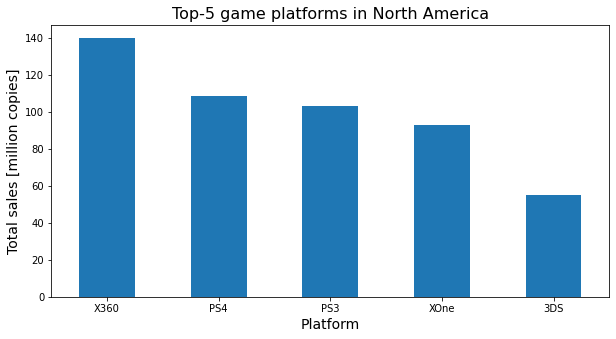

In [42]:
na_top_platforms = actual_df.groupby('platform')[['na_sales']].agg(['sum']).sort_values([('na_sales', 'sum')], ascending=False).head()
na_top_platforms.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game platforms in North America', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

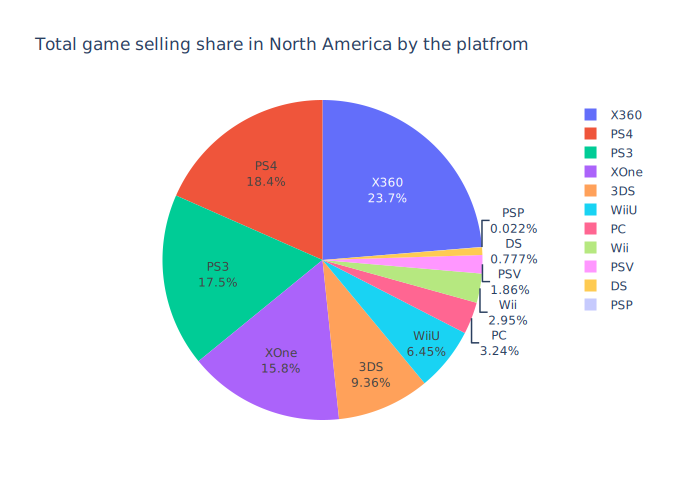

In [43]:
fig = px.pie(actual_df, values=actual_df['na_sales'], names=actual_df['platform'],
             title='Total game selling share in North America by the platfrom')
fig.update_traces(text = actual_df['platform'])
fig.show()

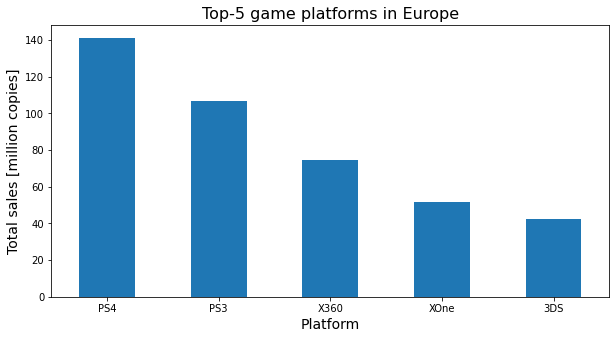

In [44]:
eu_top_platforms = actual_df.groupby('platform')[['eu_sales']].agg(['sum']).sort_values([('eu_sales', 'sum')], ascending=False).head()
eu_top_platforms.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game platforms in Europe', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

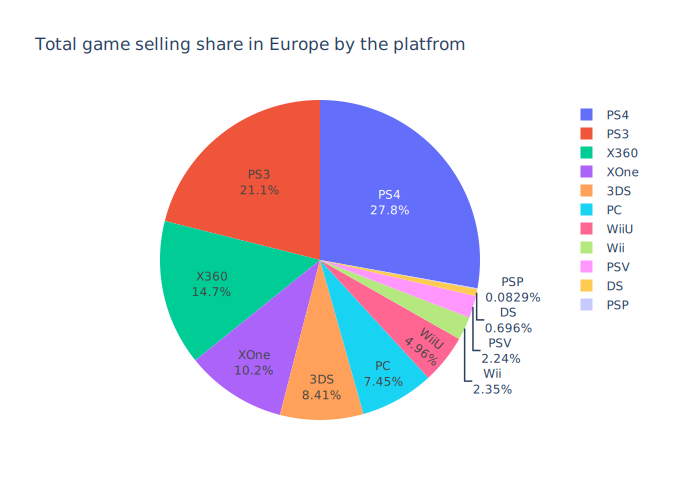

In [45]:
fig = px.pie(actual_df, values=actual_df['eu_sales'], names=actual_df['platform'],
             title='Total game selling share in Europe by the platfrom')
fig.update_traces(text = actual_df['platform'])
fig.show()

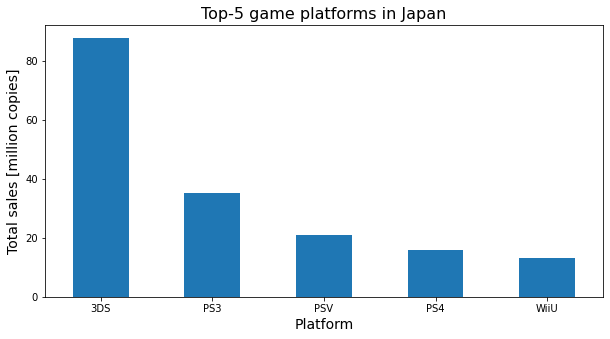

In [46]:
jp_top_platforms = actual_df.groupby('platform')[['jp_sales']].agg(['sum']).sort_values([('jp_sales', 'sum')], ascending=False).head()
jp_top_platforms.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game platforms in Japan', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

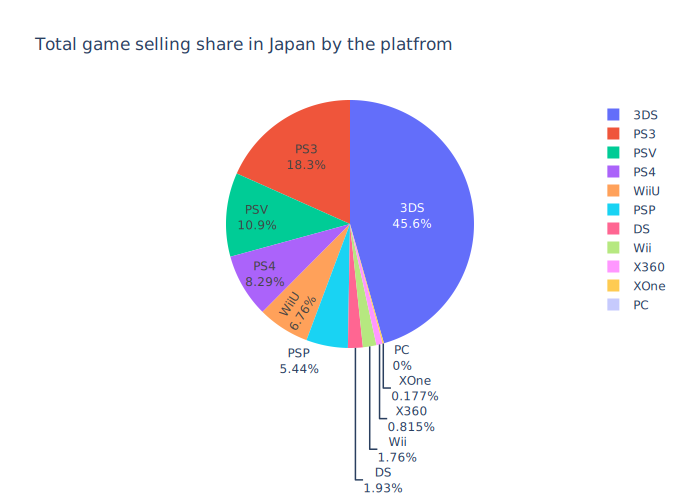

In [47]:
fig = px.pie(actual_df, values=actual_df['jp_sales'], names=actual_df['platform'],
             title='Total game selling share in Japan by the platfrom')
fig.update_traces(text = actual_df['platform'])
fig.show()

**Промежуточный вывод:** Самые популярные платформы в регионах сильно различаются. Япония выбивается сильнее всего.
В Северной Америке и Европе популярны стационарные платформы с довольно плавным уменьшением в популярности, тогда как в Японии самой популярной платформоя является мобильная Nintendo 3DS с очень сильным отрывом от остальных.

### Самые популярные жанры по регионам

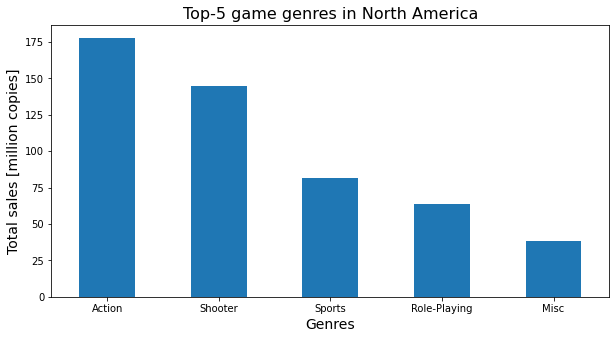

In [48]:
na_top_genres = actual_df.groupby('genre')[['na_sales']].agg(['sum']).sort_values([('na_sales', 'sum')], ascending=False).head()
na_top_genres.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game genres in North America', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

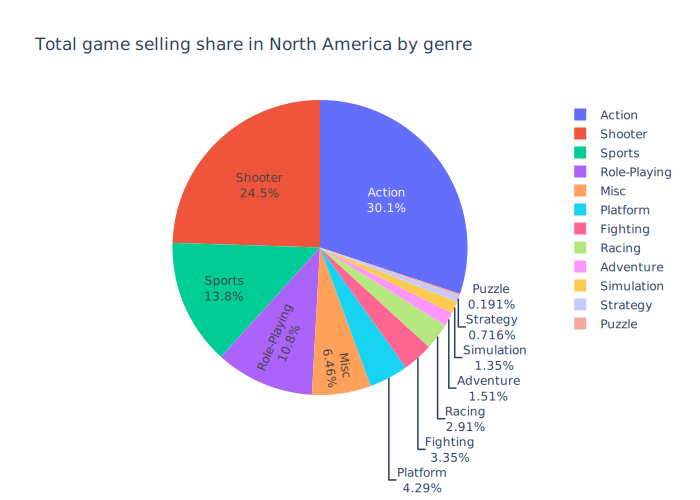

In [49]:
fig = px.pie(actual_df, values=actual_df['na_sales'], names=actual_df['genre'],
             title='Total game selling share in North America by genre')
fig.update_traces(text = actual_df['genre'])
fig.show()

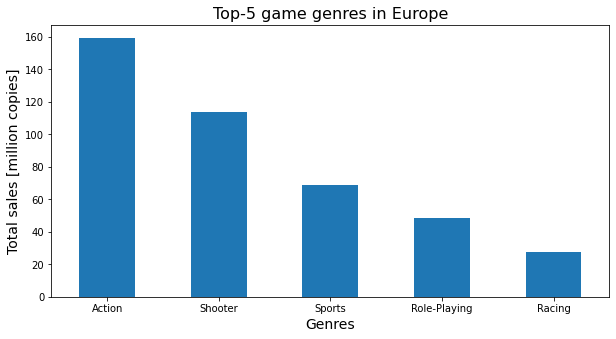

In [50]:
eu_top_genres = actual_df.groupby('genre')[['eu_sales']].agg(['sum']).sort_values([('eu_sales', 'sum')], ascending=False).head()
eu_top_genres.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game genres in Europe', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

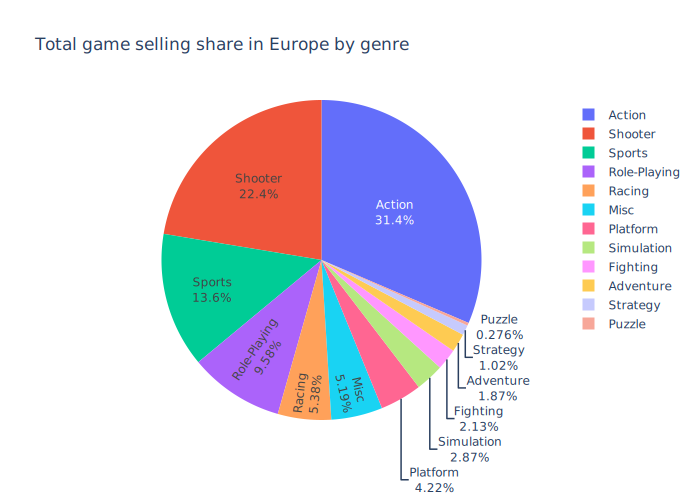

In [51]:
fig = px.pie(actual_df, values=actual_df['eu_sales'], names=actual_df['genre'],
             title='Total game selling share in Europe by genre')
fig.update_traces(text = actual_df['genre'])
fig.show()

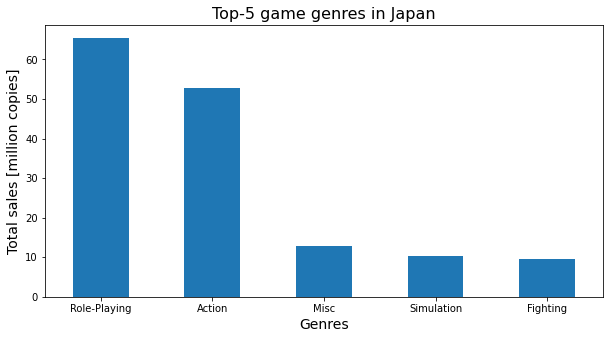

In [52]:
jp_top_genres = actual_df.groupby('genre')[['jp_sales']].agg(['sum']).sort_values([('jp_sales', 'sum')], ascending=False).head()
jp_top_genres.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game genres in Japan', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

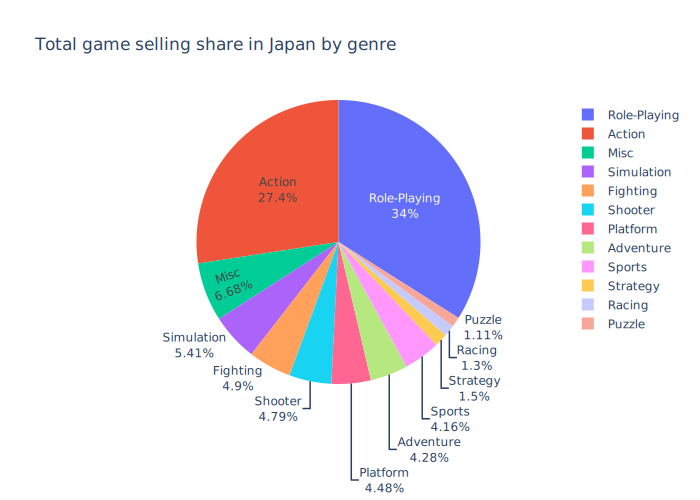

In [53]:
fig = px.pie(actual_df, values=actual_df['jp_sales'], names=actual_df['genre'],
             title='Total game selling share in Japan by genre')
fig.update_traces(text = actual_df['genre'])
fig.show()

**Промежуточный вывод:** Самые популярные жанры в Северной Америке и Европе они практически идентичны, кроме пятой позиции. В Японии же на первом месте `Role-Playing` и на втором уже `Action`.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?
#### North America

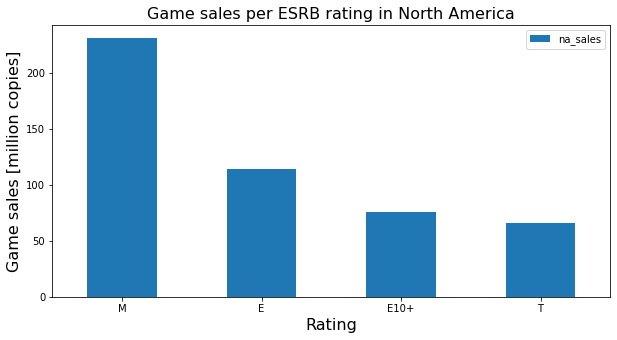

In [54]:
na_rating_sales = actual_df.groupby('rating')[['na_sales']].sum().sort_values('na_sales',ascending=False)
na_rating_sales.plot(kind='bar', rot=0, figsize=(10, 5))
plt.title('Game sales per ESRB rating in North America', fontsize=16)
plt.ylabel('Game sales [million copies]', fontsize=16)
plt.xlabel('Rating', fontsize=16)
plt.show()

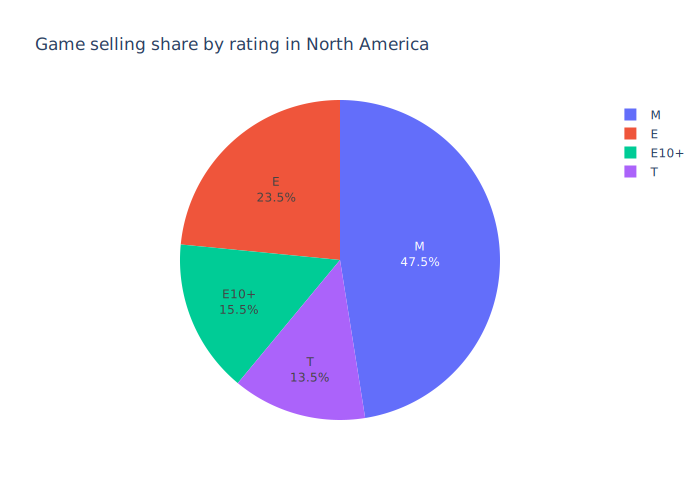

In [55]:
fig = px.pie(na_rating_sales, values='na_sales', names=na_rating_sales.index,
             title='Game selling share by rating in North America')
fig.update_traces(text = na_rating_sales.index)
fig.show()

#### Europe

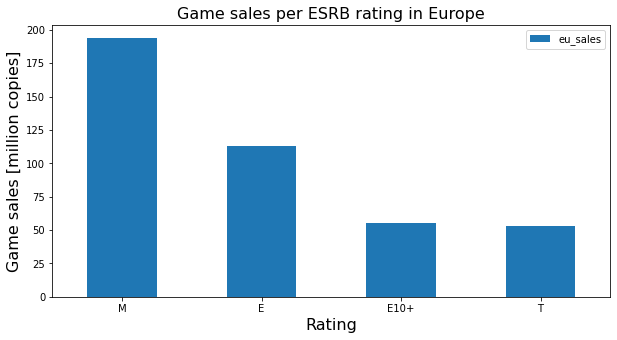

In [56]:
eu_rating_sales = actual_df.groupby('rating')[['eu_sales']].sum().sort_values('eu_sales',ascending=False)
eu_rating_sales.plot(kind='bar', rot=0, figsize=(10, 5))
plt.title('Game sales per ESRB rating in Europe', fontsize=16)
plt.ylabel('Game sales [million copies]', fontsize=16)
plt.xlabel('Rating', fontsize=16)
plt.show()

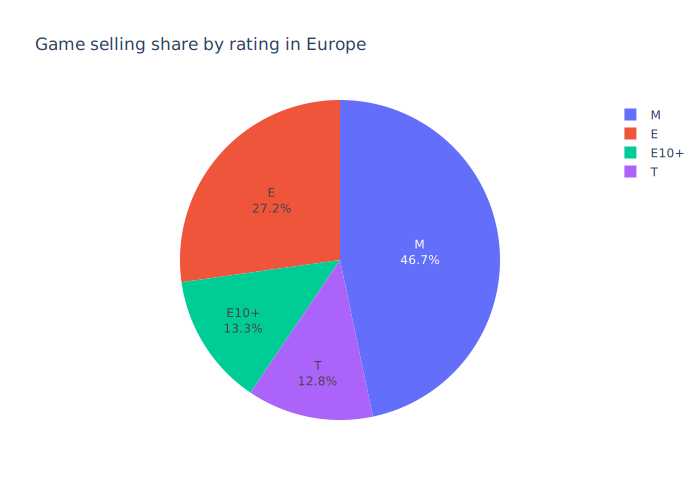

In [57]:
fig = px.pie(eu_rating_sales, values='eu_sales', names=eu_rating_sales.index,
             title='Game selling share by rating in Europe')
fig.update_traces(text = eu_rating_sales.index)
fig.show()

#### Japan

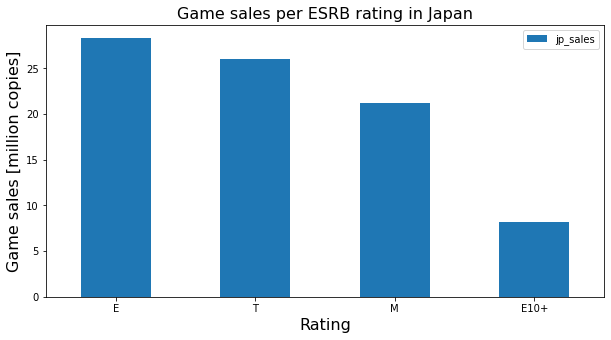

In [58]:
jp_rating_sales = actual_df.groupby('rating')[['jp_sales']].sum().sort_values('jp_sales',ascending=False)
jp_rating_sales.plot(kind='bar', rot=0, figsize=(10, 5))
plt.title('Game sales per ESRB rating in Japan', fontsize=16)
plt.ylabel('Game sales [million copies]', fontsize=16)
plt.xlabel('Rating', fontsize=16)
plt.show()

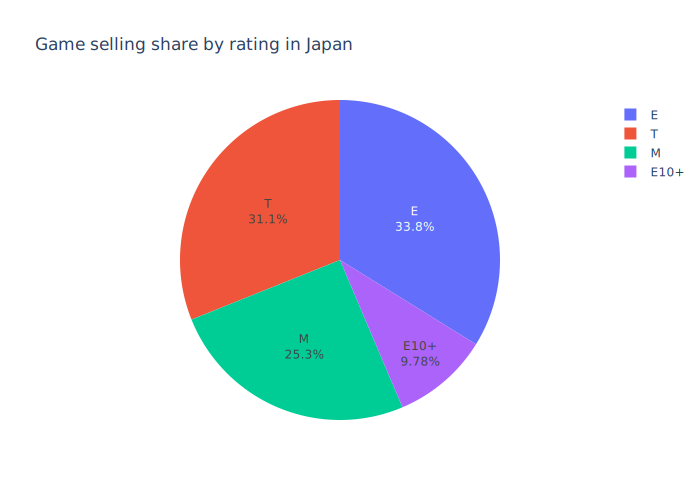

In [59]:
fig = px.pie(jp_rating_sales, values='jp_sales', names=jp_rating_sales.index,
             title='Game selling share by rating in Japan')
fig.update_traces(text = jp_rating_sales.index)
fig.show()

**Промежуточный вывод:** Классификация рейтингов:
- Е - Everyone (all ages)
- T - Teen (13+)
- M - Mature (17+)
- E10+ - Everyone 10+

Основные продажи в Северной Америке и Европе по рейтингам ESRB распределены неравномерно, почти совпадают для обоих регионов и основная масса продаж приходится на категорию **M** т.е. на возрастную группу 17+.
В Японии же основные продажи по категориям распределены более равномерно и основная масса приходится на категории **Е**, **Т** и **М**.

# Проверка гипотез
## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевой гипотезой будет утверждение что: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые.

Для проверки данных утверждений используем "Гипотезу о равенстве средних двух генеральных совокупностей", т.к. генеральные совокупности не зависят друг от друга, и их выборочные средние нормально распределены.
Обе выборки практически одинакового размера, параметр `equal_var` задавать не будем.

In [60]:
len(actual_df[actual_df.platform=='XOne']['user_score'])

247

In [61]:
len(actual_df[actual_df.platform=='PC']['user_score'])

250

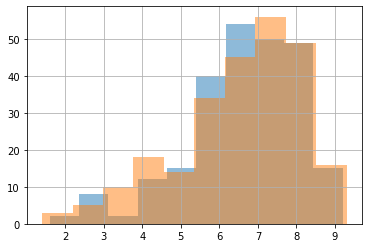

In [62]:
# посмотрим распределение оценок в двух генеральных совокупностях.
actual_df[actual_df.platform=='XOne']['user_score'].hist(alpha=0.5)
actual_df[actual_df.platform=='PC']['user_score'].hist(alpha=0.5)
plt.show()

In [63]:
alpha = .05

result = st.ttest_ind(actual_df[actual_df.platform=='XOne']['user_score'],
                      actual_df[actual_df.platform=='PC']['user_score'])

print(f'p-значение = {result.pvalue}')

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение = 0.613908387662496
Не получилось отвергнуть нулевую гипотезу


**Промежуточный вывод:** Как видим из статистического теста - нулевую гипотезу не получилось отвергнуть. Это значит, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевой гипотезой будет утверждение что: Средние пользовательские рейтинги жанров Action и Sports *одинаковые*. 

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports *разные*.

Для проверки данных утверждений используем "Гипотезу о равенстве средних двух генеральных совокупностей", т.к. генеральные совокупности не зависят друг от друга, и их выборочные средние нормально распределены.
Выборки сильно различаются в размере, параметр `equal_var` зададим на `False`.

Задайте самостоятельно пороговое значение alpha.

**Поясните:**

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

In [64]:
len(actual_df[actual_df.genre=='Sports']['user_score'])

268

In [65]:
len(actual_df[actual_df.genre=='Action']['user_score'])

1031

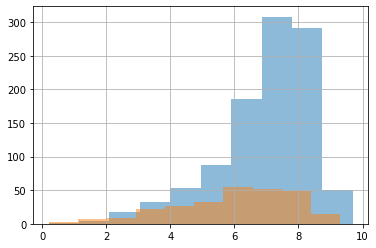

In [66]:
# посмотрим распределение оценок в двух генеральных совокупностях.
actual_df[actual_df.genre=='Action']['user_score'].hist(alpha=0.5)
actual_df[actual_df.genre=='Sports']['user_score'].hist(alpha=0.5)
plt.show()

In [67]:
alpha = .05

result = st.ttest_ind(actual_df[actual_df.genre=='Action']['user_score'],
                      actual_df[actual_df.genre=='Sports']['user_score'], equal_var=False)

print(f'p-значение = {result.pvalue}')

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение = 2.8545572615994676e-15
Отвергаем нулевую гипотезу


**Промежуточный вывод:** Как видим из статистического теста - нулевую гипотеза была отвергнута. Это значит, что средние пользовательские рейтинги жанров Action и Sports разные.

# Общий вывод

В данной работе данные были подготовлены к обработке (были заменены названия столбцов; преобразованы типы данных; заполнены, где это возможно, пропуски и т.д.). Также, были посчитаны общие продажи по всем регионам.

Из исследовательского анализа данных видно, что в период 1980-1994 кол-во ежегодно выпускаемых игр расло довольно медленно. На период 1994-2008 пришелся резкий рост числа выпущенных тайтлов, период 2009-2012 показал резкий спад в кол-ве выпускаемых игр, а период 2012-2016 характеризуется постепенным снижением выпущенных игр вернувшись к значениям конца 90-х, начала 00-х годов. Похожая ситуация и с продажами. Скорее всего, главной причиной такого падения может быть то, что в числе игровых платформ не учтены мобильные телефоны, которые и "пожрали" все эти продажи и выпуски - разработчики и пользователи переключили свой фокус туда.

Playstation 2 и Nintendo DS являются лидерами среди всех платформ по кол-ву выпущенных игр с большим отрывом. В то же время, платформами с самыми большими продажами игр являются Playstation 2 и XBox 360. Медианная "продолжительность жизни" всех платформ составляет 7 лет, топовые же платформы "живут" по 11 лет.

В "актуальном периоде" (2012-2016), Plastation 4, XBox One и Nintendo 3DS ещё представляют какую-то коммерческую ценность в плане ежегодных продаж. Медианное кол-во продаж для каждой из платформ в актуальном периоде не сильно отличается и составляет около 180 тыс. проданных копий, с очень сильными выбросами по отдельным очень популярным играм, которые, видимо, и приносят прибыль издателям.

Также исследование показало положительную корреляцию между продажами игр и оценками критиков. Оценки пользователей корреляции с продажами игр не имеют. В актуальном периоде, самыми прибыльными жанрами являются Action и Shooter, с большим отрывом от остальных. Это может быть связано с тем, что игры покупает в основном мужская аудитория. 

Портреты пользователей регионов North America и Europe в целом практически совпадают и имеют лишь небольшие отличия в предпочтениях игровых платформ (самая популярная платформа в Северной Америке является Xbox360, а в Европе Playstation 4), т.е. в этих регионах в основном популярны стационарные игровые платформы. В обоих регионах продажи по возрастным категориям неравномерны и основная масса (около половины) приходится на категорию "M" (17+).

В Японии же портрет пользователя существенно отличается от "западного" - самыми популярными, с большим отрывом от остальных, является мобильная платформа Nintendo 3DS, а самый популярный жанр - Role-Playing, и уже на втором месте Action, с большим отрывом от остальных. Распределение продаж по рейтингу намного более равномерное чем на "западе" и в основном представлено категориями E, T, и М.

В конце были исследованы гипотезы:
- о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и данная гипотеза не была отвергнута.
- о том что средние пользовательские рейтинги жанров Action и Sports одинаковые, и данная гипотеза была отвергнута.

В итоге, чтобы получить прибыль на рынках Северной Америки и Европы стоит ориентироваться на платформы PS4 и Xbox One, а жанры - Action и Shooter. В Японии же стоит ориентироваться в основном на Nintendo 3DS и жанры Role-Playing и Action.